In [1]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import skimage.io
import skimage.filters
from skimage.filters import try_all_threshold
import matplotlib.image as mpimg
from scipy import ndimage as ndi
from skimage.transform import resize
import skimage.morphology
import skimage.feature
import math
from math import sqrt
from skimage.color import rgb2gray
from skimage import measure
import skan
from skan import csr
from skan import summarize
from skan import draw

Here we simply import the image (typically a .tif file type), split the 3 channels, and generate a max intensity projection for each.

(120, 512, 512)
uint16
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9735857d0>


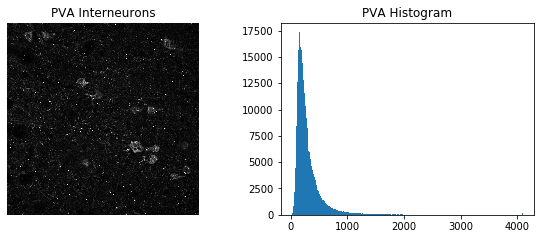

In [2]:
img = skimage.io.imread('slide_3_section_5_60x_z_stack_3.tif')
print(img.shape)
print(img.dtype)
DAPI = img[0::3]
PNN = img[1::3]
PVA = img[2::3]

DAPI_MaxIP = np.max(DAPI,axis=0)
PNN_MaxIP = np.max(PNN,axis=0)
PVA_MaxIP = np.max(PVA,axis=0)

fig, ax = plt.subplots(3,2, figsize=(10, 12))
print(ax)

ax[0,0] = plt.subplot(1, 2, 1)
ax[0,1] = plt.subplot(1, 2, 2)
ax[1,0] = plt.subplot(2, 2, 1)
ax[1,1] = plt.subplot(2, 2, 2)
ax[2,0] = plt.subplot(3, 2, 1)
ax[2,1] = plt.subplot(3, 2, 2)


ax[0,0].imshow(DAPI_MaxIP, cmap=plt.cm.gray)
ax[0,0].set_title('DAPI')
ax[0,0].axis('off')

ax[0,1].hist(DAPI_MaxIP.ravel(), bins=256)
ax[0,1].set_title('DAPI Histogram')

ax[1,0].imshow(PNN_MaxIP, cmap=plt.cm.gray)
ax[1,0].set_title('PNN')
ax[1,0].axis('off')

ax[1,1].hist(PNN_MaxIP.ravel(), bins=256)
ax[1,1].set_title('PNN Histogram')

ax[2,0].imshow(PVA_MaxIP, cmap=plt.cm.gray)
ax[2,0].set_title('PVA Interneurons')
ax[2,0].axis('off')

ax[2,1].hist(PVA_MaxIP.ravel(), bins=256)
ax[2,1].set_title('PVA Histogram')

plt.show()


#DAPIplot = plt.imshow(1-DAPI_MaxIP, cmap='Greys')
#plt.show()
#plt.hist(DAPI_MaxIP.ravel(), bins=256)
#plt.ylim(0, 30000)
#plt.xlim(0, 3000)
#plt.show()
#PNNplot = plt.imshow(1-PNN_MaxIP, cmap='Greys')
#plt.show()
#plt.hist(PNN_MaxIP.ravel(), bins=256)
#plt.ylim(0, 30000)
#plt.xlim(0, 3000)
#plt.show()
#PVAplot = plt.imshow(1-PVA_MaxIP, cmap='Greys')
#plt.show()

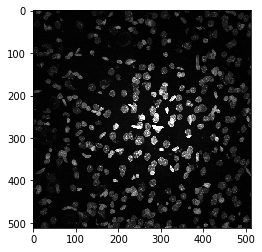

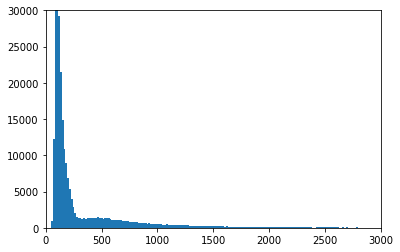

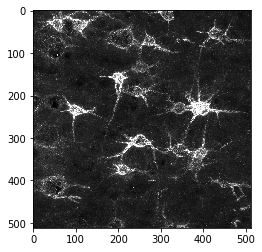

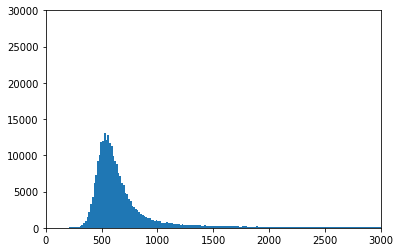

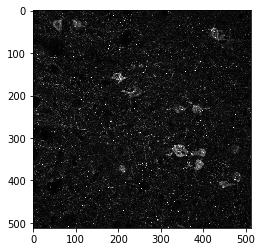

In [3]:
DAPI = img[0::3]
PNN = img[1::3]
PVA = img[2::3]

DAPI_MaxIP = np.max(DAPI,axis=0)
PNN_MaxIP = np.max(PNN,axis=0)
PVA_MaxIP = np.max(PVA,axis=0)


DAPIplot = plt.imshow(1-DAPI_MaxIP, cmap='Greys')
plt.show()
plt.hist(DAPI_MaxIP.ravel(), bins=256)
plt.ylim(0, 30000)
plt.xlim(0, 3000)
plt.show()
PNNplot = plt.imshow((1-PNN_MaxIP), cmap='Greys')
plt.show()
plt.hist(PNN_MaxIP.ravel(), bins=256)
plt.ylim(0, 30000)
plt.xlim(0, 3000)
plt.show()
PVAplot = plt.imshow(1-PVA_MaxIP, cmap='Greys')
plt.show()

In [ ]:
try_all_threshold(PNN_MaxIP, figsize=(20,18))

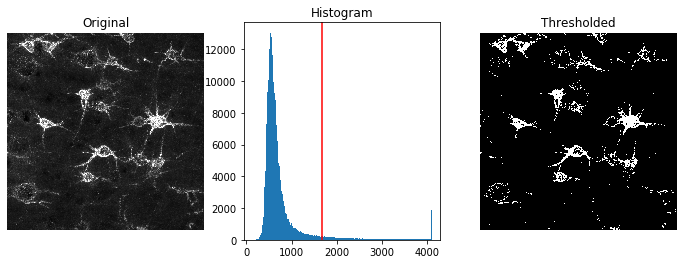

In [4]:
thresh = skimage.filters.threshold_otsu(PNN_MaxIP)
PNN_binary = PNN_MaxIP > thresh

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(PNN_MaxIP, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(PNN_MaxIP.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(PNN_binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

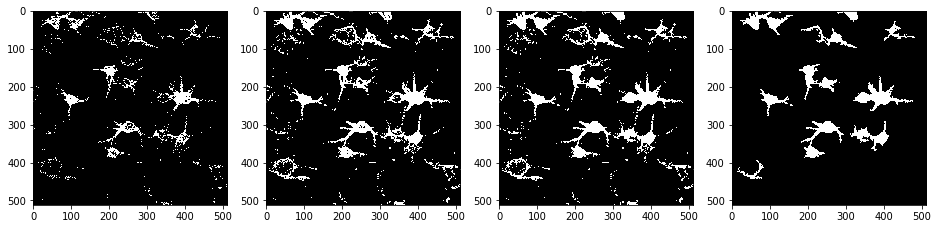

In [5]:
PNN_dilation = skimage.morphology.binary_dilation(PNN_binary)
PNN_filled_holes = ndi.binary_fill_holes(PNN_dilation)
PNN_clean = skimage.morphology.remove_small_objects(PNN_filled_holes, min_size=400)


fig, axes = plt.subplots(ncols=4, figsize=(16, 8))
ax = axes.ravel()
ax[0] = plt.subplot(1, 4, 1)
ax[1] = plt.subplot(1, 4, 2)
ax[2] = plt.subplot(1, 4, 3)
ax[3] = plt.subplot(1, 4, 4)
ax[0].imshow(PNN_binary, cmap=plt.cm.gray)
ax[1].imshow(PNN_dilation, cmap=plt.cm.gray)
ax[2].imshow(PNN_filled_holes, cmap=plt.cm.gray)
ax[3].imshow(PNN_clean, cmap=plt.cm.gray)
plt.show()

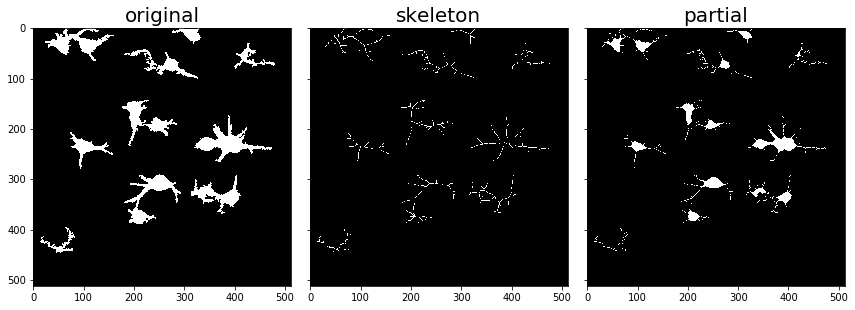

In [6]:
skeleton = skimage.morphology.skeletonize(PNN_clean)
partial_skel = skimage.morphology.thin(PNN_clean, max_iter=5)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 12), sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(PNN_clean, cmap=plt.cm.gray)
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeleton', fontsize=20)

ax[2].imshow(partial_skel, cmap=plt.cm.gray)
ax[2].set_title('partial', fontsize=20)

fig.tight_layout()
plt.show()

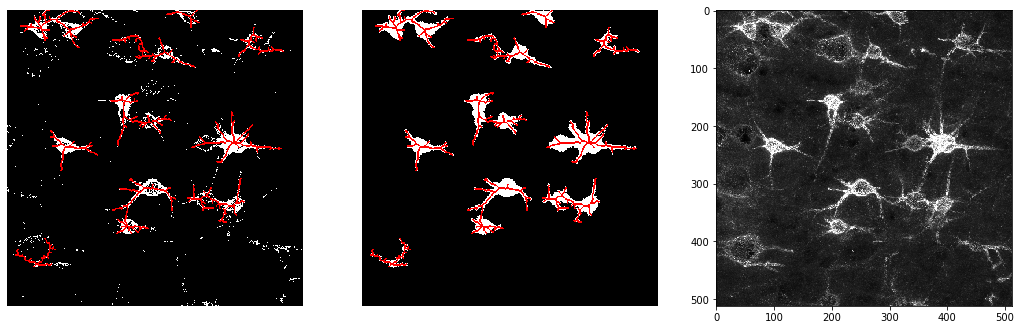

In [7]:
from skan import draw

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 18))
ax = axes.ravel()
#ax[0] = plt.imshow(1-PNN_MaxIP*50, cmap='Greys')
draw.overlay_skeleton_2d(PNN_binary, skeleton, dilate=1, axes=ax[0])
draw.overlay_skeleton_2d(PNN_clean, skeleton, dilate=1, axes=ax[1])
ax[2] = plt.imshow(1-PNN_MaxIP, cmap='Greys')

In [ ]:
from skan import csr
from skan import summarize

branch_data = csr.summarise(skeleton)
print(branch_data.shape)
branch_data

## The goal here is to write a script that will quantify the number of branches, total branch length, and average branch length for each skeleton in the dataframe

In [ ]:
print(branch_data["skeleton-id"].max())
print(branch_data['branch-type'].max(), ",", branch_data['branch-type'].min())
print(len((branch_data)))
print(branch_data['branch-distance'][230])

In [ ]:
skel_data = ["skeleton-id", "# of branches", "total branch length", 'avg branch length']
output_data = pd.DataFrame(columns = skel_data)

num_skel = max(branch_data['skeleton-id'])
tot_branch = len(branch_data)

for skels in range(1, num_skel+1):
    num_branch = 0
    tot_length = 0
    for branch in range(0, tot_branch):
        if branch_data['skeleton-id'][branch] == skels:
            num_branch = num_branch + 1
            tot_length = tot_length + branch_data['branch-distance'][branch]
    avg_length = tot_length/num_branch
    output_data.loc[skels] = [skels, num_branch, tot_length, avg_length]

In [ ]:
output_data

In [ ]:
output_data.plot(x='# of branches', y='total branch length', style='o')
output_data.plot(x='# of branches', y='avg branch length', style='rx')

In [ ]:
print(PNN_clean[0:5])
print(DAPI_MaxIP[0:5])
print(len(PNN_clean))

In [ ]:
filtered_DAPI = np.zeros(int(len(DAPI_MaxIP)),int(len(DAPI_MaxIP))
for ypixel in range(0,len(PNN_clean)):
    for xpixel in range(0,len(PNN_clean)):
        if PNN_clean[ypixel,xpixel] == True:
            filtered_DAPI[ypixel,xpixel] = DAPI_MaxIP[ypixel,xpixel]
        else:
            filtered_DAPI[ypixel,xpixel] = 0


In [ ]:

DAPIplot = plt.imshow(1-DAPI_MaxIP, cmap='Greys')
plt.show()

## Figuring out how to subtract out pixels that contain DAPI from PNN channel prior to skeletonizing

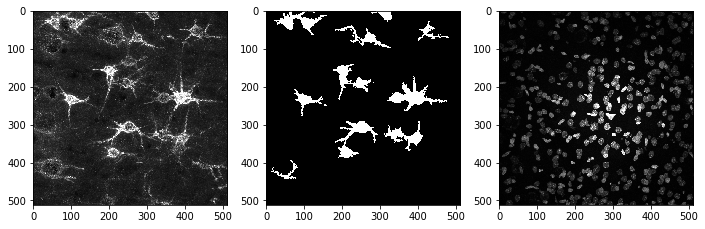

In [27]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 8))
ax = axes.ravel()
ax[0] = plt.subplot(1, 4, 1)
ax[1] = plt.subplot(1, 4, 2)
ax[2] = plt.subplot(1, 4, 3)
ax[0].imshow(1-PNN_MaxIP, cmap='Greys')
ax[1].imshow(PNN_clean, cmap=plt.cm.gray)
ax[2].imshow(1-DAPI_MaxIP, cmap='Greys')
plt.show()

In [28]:
labeled_PNN, _ = ndi.label(PNN_clean)
#DAPI_props = measure.regionprops(labeled_DAPI)

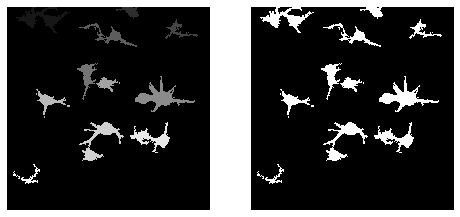

In [29]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)
ax[0].imshow(labeled_PNN, cmap=plt.cm.gray)
ax[0].axis('off')
ax[1].imshow(PNN_clean, cmap=plt.cm.gray)
ax[1].axis('off')
plt.show()

In [30]:
labeled_PNN.shape

(512, 512)

In [31]:
np.amax(labeled_PNN)

11

In [38]:
filtered_DAPI = np.zeros((512,512))

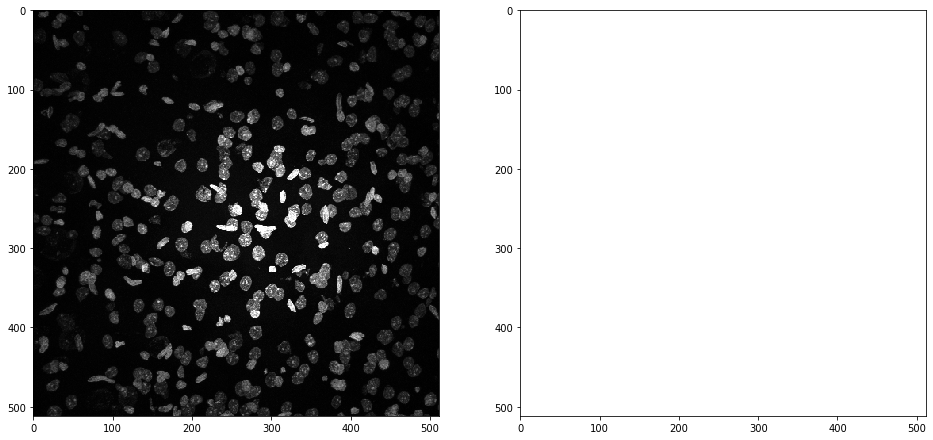

In [39]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)
ax[0].imshow(1-DAPI_MaxIP, cmap='Greys')
ax[1].imshow(1-filtered_DAPI, cmap='Greys')
plt.show()

In [40]:
count = 0
current_max = 0
for row in range(0,labeled_PNN.shape[1]):
    for col in range(0,labeled_PNN.shape[0]):
        if labeled_PNN[row][col] != 0:
            if labeled_PNN[row][col] > current_max:
                current_max = labeled_PNN[row][col]
            filtered_DAPI[row][col] = DAPI_MaxIP[row][col]
            count += 1
            
print(count)
print(current_max)

20424
11


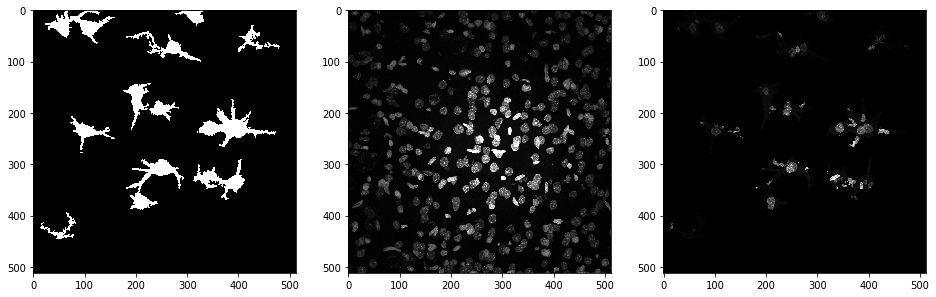

In [42]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 8))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)
ax[0].imshow(PNN_clean, cmap=plt.cm.gray)
ax[1].imshow(1-DAPI_MaxIP, cmap='Greys')
ax[2].imshow(1-filtered_DAPI, cmap='Greys')
plt.show()

In [ ]:
np.amin(DAPI_MaxIP)

In [8]:
np.amax(DAPI_MaxIP)

4095